# Assignment 7: Implement a Neural Network Using Keras

In [27]:
import pandas as pd
import numpy as np
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
import time

In this assignment, you will implement a feedforward neural network using Keras for a binary classification problem. You will complete the following tasks:
    
1. Build your DataFrame and define your ML problem:
    * Load the Airbnb "listings" data set
    * Define the label - what are you predicting?
    * Identify the features
2. Prepare your data so that it is ready for modeling.
3. Create labeled examples from the data set.
4. Split the data into training and test data sets.
5. Construct a neural network.
6. Train the neural network.
7. Evaluate the neural network model's performance on the training, validation and test data.
8. Experiment with ways to improve the model's performance.

For this assignment, use the demo <i>Implementing a Neural Network in Keras</i> that is contained in this unit as a reference.

**<font color='red'>Note: some of the code cells in this notebook may take a while to run</font>**

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the data set ``airbnbData_train``. 

<b>Task</b>: In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`.

You will be working with the file named "airbnbData_train.csv" that is located in a folder named "data_NN".

In [28]:
filename = 'data_NN/airbnbData_train.csv'
df = pd.read_csv(filename)

#### Define the Label

Your goal is to train a machine learning model that predicts whether an Airbnb host is a 'super host'. This is an example of supervised learning and is a binary classification problem. In our dataset, our label will be the `host_is_superhost` column and the label will either contain the value `True` or `False`.

#### Identify Features

Our features will be all of the remaining columns in the dataset.

## Part 2. Prepare Your Data

Many data preparation techniques have already been performed and the data is almost ready for modeling; the data set has one-hot encoded categorical variables, scaled numerical values, and imputed missing values. However, the data set has a few features that have boolean values. When working with Keras, features should have floating point values.

Let's convert these features from booleans to floats.

<b>Task:</b> Using the Pandas `astype()` method, convert any boolean columns in DataFrame `df` to floating point columns. Use the online [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) as a reference.  

Note that there are a few different ways that you can accomplish this task. You can convert one boolean column at a time, or you can use the Pandas `select_dtypes()` method to find and return all boolean columns in DataFrame `df` and then convert the columns as a group. Use the online [documentation]( https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) as a reference. 


In [29]:
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(float)

Let's inspect the columns after the conversion. 

In [30]:
df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,1.0,1.0,1.0,0.0,-0.578829,-2.845589,-0.054298,-0.054298,-1.007673,...,1.888373,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,-4.685756,-0.430024,-0.112284,-0.112284,0.067470,...,0.409419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.578052,-2.473964,-0.112284,-0.112284,0.605041,...,-1.069535,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.578052,1.010024,-0.112284,-0.112284,-0.470102,...,-0.576550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,1.0,0.0,-0.054002,-0.066308,-0.112284,-0.112284,-1.007673,...,0.902404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Part 3. Create Labeled Examples from the Data Set 

<b>Task</b>: In the code cell below, create labeled examples from DataFrame `df`.

In [31]:
X = df.drop(columns = ['host_is_superhost'])
y = df['host_is_superhost']

## Part 4. Create Training and Test Data Sets

<b>Task</b>: In the code cell below, create training and test sets out of the labeled examples. Create a test set that is 25 percent of the size of the data set. Save the results to variables `X_train, X_test, y_train, y_test`.


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [33]:
X_train.shape

(21016, 49)

## Part 5. Construct the Neural Network


### Step 1.  Define Model Structure

Next we will create our neural network structure. We will create an input layer, three hidden layers and an output layer:

* <b>Input layer</b>: The input layer will have the input shape corresponding to the number of features. 
* <b>Hidden layers</b>: We will create three hidden layers of widths (number of nodes) 64, 32, and 16. They will utilize the ReLU activation function. 
* <b>Output layer</b>: The output layer will have a width of 1. The output layer will utilize the sigmoid activation function. Since we are working with binary classification, we will be using the sigmoid activation function to map the output to a probability between 0.0 and 1.0. We can later set a threshold and assume that the prediction is class 1 if the probability is larger than or equal to our threshold, or class 0 if it is lower than our threshold.

To construct the neural network model using Keras, we will do the following:
* We will use the Keras `Sequential` class to group a stack of layers. This will be our neural network model object. For more information, consult the Keras online [documentation](https://keras.io/api/models/sequential/#sequential-class).
* We will use the `InputLayer` class to create the input layer. For more information, consult  the Keras online [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer).
* We will use the `Dense` class to create each hidden layer and the output layer. For more information, consult the Keras online [documentation](https://keras.io/api/layers/core_layers/dense/).
* We will add each layer to the neural network model object.


<b>Task:</b> Follow these steps to complete the code in the cell below:

1. Create the neural network model object. 
    * Use ``keras.Sequential() `` to create a model object, and assign the result to the variable ```nn_model```.
    
    
2. Create the input layer: 
    * Call `keras.layers.InputLayer()` with the argument `input_shape` to specify the dimensions of the input. In this case, the dimensions will be the number of features (coumns) in `X_train`. Assign the number of features to the argument `input_shape`.
    * Assign the results to the variable `input_layer`.
    * Use `nn_model.add(input_layer)` to add the layer `input_layer` to the neural network model object.


3. Create the first hidden layer:
    * Call `keras.layers.Dense()` with the arguments `units=64` and `activation='relu'`. 
    * Assign the results to the variable `hidden_layer_1`.
    * Use `nn_model.add(hidden_layer_1)` to add the layer `hidden_layer_1` to the neural network model object.


4. Create the second hidden layer using the same approach that you used to create the first hidden layer, specifying 32 units and the `relu` activation function. 
    * Assign the results to the variable `hidden_layer_2`.
    * Add the layer to the neural network model object.
    
    
5. Create the third hidden layer using the same approach that you used to create the first two hidden layers, specifying 16 units and the `relu` activation function. 
    * Assign the results to the variable `hidden_layer_3`.
    * Add the layer to the neural network model object.


6. Create the output layer using the same approach that you used to create the hidden layers, specifying 1 unit and the `sigmoid` activation function. 
   * Assign the results to the variable `output_layer`.
   * Add the layer to the neural network model object.
   

In [34]:
# 1. Create model object:
nn_model = keras.Sequential()


# 2. Create the input layer and add it to the model object: 
# Create input layer:
input_layer = keras.layers.InputLayer(input_shape=(X_train.shape[1],))
# Add input_layer to the model object:
nn_model.add(input_layer)


# 3. Create the first hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
# Add hidden_layer_1 to the model object:
# YOUR CODE HERE


# 4. Create the second hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
# Add hidden_layer_2 to the model object:
nn_model.add(hidden_layer_2)


# 5. Create the third hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
# Add hidden_layer_3 to the model object:
nn_model.add(hidden_layer_3)


# 6. Create the output layer and add it to the model object:
# Create output layer:
output_layer = keras.layers.Dense(units=1, activation='sigmoid')
# Add output_layer to the model object:
nn_model.add(output_layer)


# Print summary of neural network model structure
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                1600      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________


### Step 2. Define the Optimization Function

<b>Task:</b> In the code cell below, create a stochastic gradient descent optimizer using  `keras.optimizers.SGD()`. Specify a learning rate of 0.1 using the `learning_rate` parameter. Assign the result to the variable`sgd_optimizer`.

In [35]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

### Step 3. Define the Loss Function

<b>Task:</b> In the code cell below, create a binary cross entropy loss function using `keras.losses.BinaryCrossentropy()`. Use  the parameter `from_logits=False`. Assign the result to the variable  `loss_fn`.

In [36]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

### Step 4. Compile the Model

<b>Task:</b> In the code cell below, package the network architecture with the optimizer and the loss function using the `compile()` method. 


You will specify the optimizer, loss function and accuracy evaluation metric. Call the `nn_model.compile()` method with the following arguments:
* Use the `optimizer` parameter and assign it your optimizer variable:`optimizer=sgd_optimizer`
* Use the `loss` parameter and assign it your loss function variable: `loss=loss_fn`
* Use the `metrics` parameter and assign it the `accuracy` evaluation metric: `metrics=['accuracy']`
   

In [37]:
nn_model.compile(
    optimizer=sgd_optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

## Part 6. Fit the Model to the Training Data

We will define our own callback class to output information from our model while it is training. Make sure you execute the code cell below so that it can be used in subsequent cells.

In [38]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


<b>Task:</b> In the code cell below, fit the neural network model to the training data.

1. Call `nn_model.fit()` with the training data `X_train` and `y_train` as arguments. 

2. In addition, specify the following parameters:

    * Use the `epochs` parameter and assign it the variable to `epochs`: `epochs=num_epochs`
    * Use the `verbose` parameter and assign it the value of  0: `verbose=0`
    * Use the `callbacks` parameter and assign it a list containing our logger function: 
    `callbacks=[ProgBarLoggerNEpochs(num_epochs_M, every_n=5)]`  
    * We will use a portion of our training data to serve as validation data. Use the  `validation_split` parameter and assign it the value `0.2`
    
3. Save the results to the variable `history`. 

<b>Note</b>: This may take a while to run.

In [39]:
t0 = time.time() # start time

num_epochs = 100 # epochs

history = nn_model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    verbose=0,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
    validation_split=0.2
)


t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 100], Loss: 0.3613, Accuracy: 0.8373, Val_loss: 0.3674, Val_accuracy: 0.8297
Epoch [10/ 100], Loss: 0.3412, Accuracy: 0.8449, Val_loss: 0.3653, Val_accuracy: 0.8354
Epoch [15/ 100], Loss: 0.3301, Accuracy: 0.8492, Val_loss: 0.3638, Val_accuracy: 0.8302
Epoch [20/ 100], Loss: 0.3223, Accuracy: 0.8553, Val_loss: 0.3622, Val_accuracy: 0.8359
Epoch [25/ 100], Loss: 0.3157, Accuracy: 0.8575, Val_loss: 0.3975, Val_accuracy: 0.8223
Epoch [30/ 100], Loss: 0.3092, Accuracy: 0.8601, Val_loss: 0.3974, Val_accuracy: 0.8140
Epoch [35/ 100], Loss: 0.3056, Accuracy: 0.8621, Val_loss: 0.3819, Val_accuracy: 0.8368
Epoch [40/ 100], Loss: 0.2990, Accuracy: 0.8651, Val_loss: 0.3728, Val_accuracy: 0.8378
Epoch [45/ 100], Loss: 0.2945, Accuracy: 0.8697, Val_loss: 0.3894, Val_accuracy: 0.8252
Epoch [50/ 100], Loss: 0.2913, Accuracy: 0.8704, Val_loss: 0.3770, Val_accuracy: 0.8323
Epoch [55/ 100], Loss: 0.2854, Accuracy: 0.8732, Val_loss: 0.3863, Val_accuracy: 0.8333
Epoch [60/ 100], Loss: 0.2838, Ac

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Visualize the Model's Performance Over Time

The code below outputs both the training loss and accuracy and the validation loss and accuracy. Let us visualize the model's performance over time:

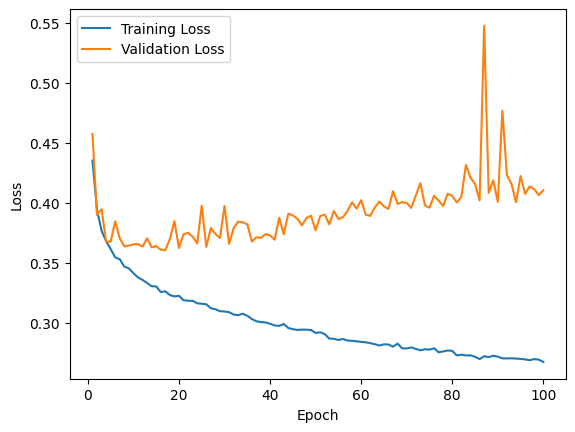

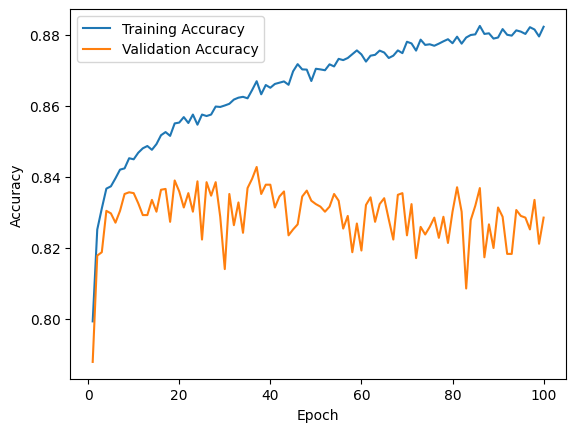

In [41]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Part 7. Evaluate the Model's Performance

We just evaluated our model's performance on the training and validation data. Let's now evaluate its performance on our test data and compare the results.

Keras makes the process of evaluating our model very easy. Recall that when we compiled the model, we specified the metric that we wanted to use to evaluate the model: accuracy. The Keras method `evaluate()` will return the loss and accuracy score of our model on our test data.

<b>Task:</b> In the code cell below, call `nn_model.evaluate()` with `X_test` and `y_test` as arguments. 

Note: The `evaluate()` method returns a list containing two values. The first value is the loss and the second value is the accuracy score.


In [42]:
loss, accuracy = nn_model.evaluate(X_test, y_test)

print('Loss: {0} Accuracy: {1}'.format(loss, accuracy))

219/219 [==============================] - 0s 433us/step - loss: 0.4097 - accuracy: 0.8269
Loss: 0.40971991419792175 Accuracy: 0.8268626928329468


Next, for every example in the test set, we will make a prediction using the `predict()` method, receive a probability between 0.0 and 1.0, and then apply a threshold (we will use a threshold of 0.6) to obtain the predicted class. We will save the class label predictions to list `class_label_predictions`.

In [43]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test)
class_label_predictions=[]

for i in range(0,len(y_test)):
    if probability_predictions[i] >= 0.6:
        class_label_predictions.append(1)
    else:
        class_label_predictions.append(0)


<b>Task</b>: In the code cell below, create a confusion matrix out of `y_test` and the list `class_label_predictions`.

In [44]:
conf_matrix = confusion_matrix(y_test, class_label_predictions)
conf_matrix

array([[4927,  344],
       [ 823,  912]])

## Part 8. Analysis

Experiment with the neural network implementation above and compare your results every time you train the network. Pay attention to the time it takes to train the network, and the resulting loss and accuracy on both the training and test data. 

Below are some ideas for things you can try:

* Adjust the learning rate.
* Change the number of epochs by experimenting with different values for the variable `num_epochs`.
* Add more hidden layers and/or experiment with different values for the `unit` parameter in the hidden layers to change the number of nodes in the hidden layers.


Record your findings in the cell below.

- keeping all other variables default and only changing the specified category
  
*Adjusting the learning rate*: At 0.1, the accuracy was 0.83. At 0.01, 0.5 and 0.001, the accuracy was at 0.82. At 0.9, my accuracy went down to 0.79. It seems the lower my value for the learning rate, the better the accuracy.

*Number of epochs*: At 100 epochs, the accuracy was 0.83. At 500, this went down to 0.82. At 1000, the accuracy was 0.78. I noticed as the number of epochs increased, the accuracy decreased.

*Changes in unit parameter*: At 64/32/16, as the units for the 3 hidden layers, my accuracy was 0.83. When I increased this to 100/50/25, my accuracy was 0.82. When I decreased it to 16/8/4, the accuracy was about 0.84. It seemed when I increased the units too high, I didn't get that much accuracy.